In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


# Functions

In [23]:
## Function to explain NA values in a column:

def NA_values(series):
    '''
    Function that takes a Pandas Series and returns a print statement explaining NAs and % of the column
    '''
    
    return print(f'Column name: {series.name}\nTotal values: {int(series.count())}\nNA values: {series.isna().sum()}\n% of NA values: {round(series.isna().mean() * 100,2)}%')

In [24]:
## Function to get the information about the outliers of a column:

def iqr(dataset, series):
    """
    Function takes dataset and column and returns the information about the outliers.
    """
    Q1 = np.percentile(series, 25)
    Q3 = np.percentile(series, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    total_outliers = len(dataset.loc[(series > upper) | (series < lower)])
    percent_outliers = total_outliers / len(dataset) * 100
    
    return print(f'Column: {series.name}\
    nLower outliers: all values lower than {round(lower, 3)}\
    nUpper outliers: all values higher than {round(upper, 3)}\
    nTotal number of rows with outliers: {total_outliers}\
    n% of outliers: {round(percent_outliers, 2)}%')

# Import and Analysis

In [25]:
data = pd.read_csv('data/online_shoppers_intention_DATAPTDIC19.csv', sep=',')

In [26]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0,0.0,0,1.0,0,0.20,0.20,0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,FALSE
1,0.0,0,0.0,0,2.0,64,0.00,0.10,0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,FALSE
2,0.0,-1,0.0,-1,1.0,-1,0.20,0.20,0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,FALSE
3,0.0,0,0.0,0,2.0,2.666.666.667,0.05,0.14,0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,FALSE
4,0.0,0,0.0,0,10.0,627.5,0.02,0.05,0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,FALSE


In [27]:
data.shape

(12330, 18)

In [ ]:
data.shape

In [28]:
data.describe()

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12315.000000,12316.000000,12315.000000,12316.000000,12316.000000,12329.000000,12329.000000,12330.000000,12330.000000,12330.000000
mean,2.317824,0.503979,31.765246,0.022152,0.043003,0.061432,2.273096,2.357097,3.147364,4.069586
std,3.322888,1.270701,44.491889,0.048427,0.048527,0.198925,3.907923,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,7.000000,0.000000,0.014286,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,0.000000,18.000000,0.003119,0.025124,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,0.000000,38.000000,0.016684,0.050000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,24.000000,705.000000,0.200000,0.200000,1.000000,99.000000,13.000000,9.000000,20.000000


In [ ]:
data.describe()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12315 non-null float64
Administrative_Duration    12316 non-null object
Informational              12316 non-null float64
Informational_Duration     12316 non-null object
ProductRelated             12315 non-null float64
ProductRelated_Duration    12316 non-null object
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null object
SpecialDay                 12329 non-null float64
Month                      12325 non-null object
OperatingSystems           12329 non-null float64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12327 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null object
dtypes:

In [ ]:
data.info()

## Dataset description:
 - Administrative:`float`. Administrative Value. `yet to identify`.
 - Administrative_Duration: `object`. Duration in Administrative Page. `Identify values and change dtype accordingly.`. 
 - Informational: `float`. Informational Value. `yet to identify` 
 - Informational_Duration: `object`. Duration in Informational Page. `Identify values and change dtype accordingly.`
 - ProductRelated: `float.` Product Related Value. `yet to identify` 
 - ProductRelated_Duration: `object`. Duration in Product Related Page. `Identify values and change dtype accordingly.` 
 - BounceRates: `float`. Bounce Rates of a web page. Percentages. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
 - ExitRates: `float`. Exit rate of a web page. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 
 - PageValues: `object`. Page values of each web page. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. `Identify values and change dtype accordingly.` 
 - SpecialDay: Special days like valentine etc. `float`. Closeness to a special date. `dtype correct`. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
 - Month: Month of the year. `object`. String to identify the month of the year. `clean`. 
 - OperatingSystems: Operating system used. `float`. `Try to explain the values`. 
 - Browser: Browser used. `integer` 
 - Region: Region of the user. `integer`. 
 - TrafficType: Traffic Type. `integer`.  
 - VisitorType: Types of Visitor `object` 
 - Weekend: Weekend or not `bool`  
 - Revenue: Revenue will be generated or not `object`. `Should be bool` 
     

# Data cleaning

### Administrative_duration

- Data type: Categorical, ´object´. Necessary change to float.
- There are some values with multiple dots. Necessary to delete these dots.
- Missing Values: There are 14 missing values, which is 0.11% out of all data. Will fill this cells with median
- 47.5% of sessions are coming from the category 0.0 of the Administrative_Duration

In [40]:
# Missing values

NA_values(data.Administrative_Duration)

Column name: Administrative_Duration
Total values: 12316
NA values: 14
% of NA values: 0.11%


In [41]:
# Fixing problems
# Drop dots from cells


0                5857
4                  56
5                  53
7                  45
11                 42
                 ... 
131.1               1
7.421.428.571       1
134.36              1
187.875             1
613.5               1
Name: Administrative_Duration, Length: 3316, dtype: int64


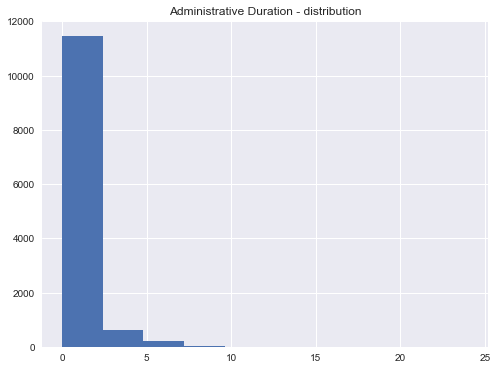

In [42]:
# Distribution

print(data.Administrative_Duration.value_counts())

plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(8,6))
ax1 = data.Informational.hist()
plt.title("Administrative Duration - distribution")
plt.show()


In [43]:
percent_info_0 = data.Administrative_Duration.value_counts()[0]/len(data)*100  
print(f'% of sessions in the category 0.0 of the Administrative_Duration pages: {round(percent_info_0,1)}')

% of sessions in the category 0.0 of the Administrative_Duration pages: 47.5


### BounceRates

In [ ]:
- Data type: Numerical, ‘float‘. Dtype change not necessary.
- Missing Values: There are 14 missing values, which is 0.11% out of all data. Will fill this cells with median
- 44.7% of sessions are coming from the category 0.0 of the BounceRates

In [44]:
# Missing values

NA_values(data.BounceRates)

Column name: BounceRates
Total values: 12316
NA values: 14
% of NA values: 0.11%


0.000000    5510
0.200000     697
0.066667     134
0.028571     115
0.050000     112
            ... 
0.002073       1
0.023457       1
0.003901       1
0.005074       1
0.007356       1
Name: BounceRates, Length: 1872, dtype: int64


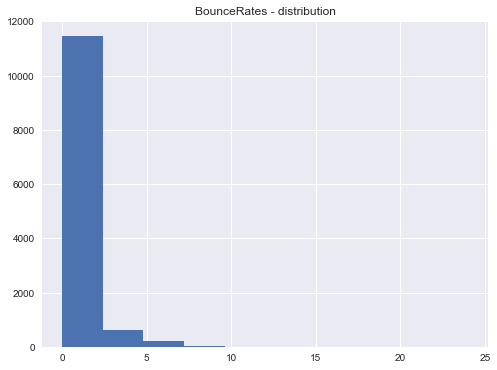

In [46]:
# Distribution

print(data.BounceRates.value_counts())

plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(8,6))
ax1 = data.Informational.hist()
plt.title("BounceRates - distribution")
plt.show()

In [45]:
percent_info_0 = data.BounceRates.value_counts()[0]/len(data)*100  
print(f'% of sessions in the category 0.0 of the BounceRates pages: {round(percent_info_0,1)}')

% of sessions in the category 0.0 of the BounceRates pages: 44.7


### OperatingSystems

In [ ]:
# checking the no. of OSes each user is having??

In [ ]:
- Data type: Numerical, ‘float‘. Dtype change not necessary.
- Missing Values: There are 1 missing values, which is 0.01% out of all data. Will fill this cell with median
- 53.4% of sessions are coming from the category 2.0 of the OperatingSystems

In [20]:
# Missing values

NA_values(data.OperatingSystems)

Column name: OperatingSystems
Total values: 12329
NA values: 1
% of NA values: 0.01%


2.0     6587
1.0     2584
3.0     2551
4.0      477
8.0       79
99.0      19
6.0       19
7.0        7
5.0        6
Name: OperatingSystems, dtype: int64


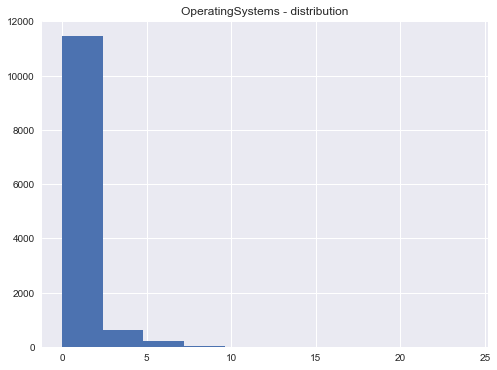

In [53]:
print(data.OperatingSystems.value_counts())

plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(8,6))
ax1 = data.Informational.hist()
plt.title("OperatingSystems - distribution")
plt.show()

In [65]:
percent_info_2 = data.OperatingSystems.value_counts()[2]/len(data)*100  
print(f'% of sessions in the category 2.0 of the OperatingSystems pages: {round(percent_info_2,1)}')

% of sessions in the category 2.0 of the OperatingSystems pages: 53.4


### Weekend

- Data type: Bool. Dtype change not necessary.
- Missing Values: There are no missing values.
- 76.7% of sessions are coming from the category False of the Weekend

In [74]:
# Missing values

NA_values(data.Weekend)

Column name: Weekend
Total values: 12330
NA values: 0
% of NA values: 0.0%


False    9462
True     2868
Name: Weekend, dtype: int64


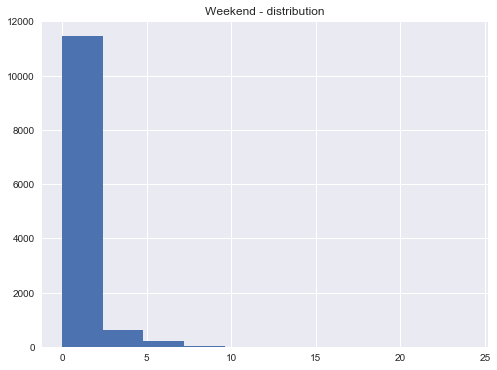

In [75]:
print(data.Weekend.value_counts())

plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(8,6))
ax1 = data.Informational.hist()
plt.title("Weekend - distribution")
plt.show()

In [73]:
percent_info_false = data.Weekend.value_counts()[0]/len(data)*100  
print(f'% of sessions in the category False of the Weekend pages, not in weekend: {round(percent_info_0,1)}')

% of sessions in the category False of the Weekend pages, not in weekend: 76.7


### Kristina:

 - **Informational**
  - Data type: Categorical, float. No changes
  - Missing Values: There are 14 missing values, which is 0.11% out of all data. It will be filled with the median
  - 78.7% of sessions are coming from the category 0.0 of the Informational pages
  - No other changes are needed
 - **ExitRates**
  - Data type: Numerical, float. No changes
  - Missing Values: There are 14 missing values, which is 0.11% out of all data. It will be filled with the median
  - Outliers: There are 1094 outliers, which is 8.87% of all data. The majority of the outliers are falling under the FALSE revenue category and under the 0.2 value of the Exit rates. Additional column will be created to be able to filter out the outliers if needed: exitrates_outliers (boolean values).
 - **Browser**
  - Data type: Categorical, integer. No changes
  - Missing Values: There are no missing values
  - The most popular browser is 2. The usage share is very similar to the standard Usage share of all browsers. Later on, in the data visualization, we will show more insights on this
  - No other changes are needed
 - **Revenue**
  - Data type: categorical, object. Will change to boolean
  - There are 4 categories, will unify the data to have only TRUE and FALSE
  - 84.53% of data falls under FALSE category of Revenue. Since it's a target column, the data will need to be equilibrated.

#### Informational

In [ ]:
# Missing values

NA_values(data.Informational)

# Filling missing values

data.Informational = data.Informational.fillna(data.Informational.median())

# Distribution

print(data.Informational.value_counts())

plt.style.use('seaborn')
fig, ax = plt.subplots(1, figsize=(8,6))
ax1 = data.Informational.hist()
plt.title("Informational - distribution")
plt.show()

# % of sessions in category 0.0 

percent_info_0 = data.Informational.value_counts()[0]/len(data)*100  
print(f'% of sessions in the category 0.0 of the Informational pages: {round(percent_info_0,1)}')

#### Exit Rates

In [ ]:
# Missing values

NA_values(data.ExitRates)

# Filling missing values

data.ExitRates = data.ExitRates.fillna(data.ExitRates.median())

# Distribution

fig, ax = plt.subplots(1, figsize=(8,6))
plt.style.use('seaborn')
ax1 = data.ExitRates.hist()
plt.title("ExitRates - distribution")
plt.show()

# Outliers

fig, ax = plt.subplots(1, figsize=(8,6))
plt.style.use('seaborn')
ax1 = data.boxplot('ExitRates')
plt.title("ExitRates - outliers")
plt.show()

iqr(data, data.ExitRates)

# Checking the distribution of outliers regarding the target column - Revenue

exitrates_outliers = data.loc[(data.ExitRates > 0.104) | (data.ExitRates < -0.039)]
print(exitrates_outliers.Revenue.value_counts())

# Checking the top exit rate values of the outliers:

print(exitrates_outliers.ExitRates.value_counts())

# Creating a new column in the dataset to indicate exit rate outliers:
# Only using the upper IQR because the lower is a negative value and we don't have values lower tahn 0.

data['exitrates_outliers']  = data['ExitRates'].apply(lambda x: 'TRUE' if x > 0.104 else 'FALSE')

# Converting column to boolean

mapa = {'TRUE': True, 'FALSE': False}
data['exitrates_outliers'] = data['exitrates_outliers'].map(mapa)

#### Browser

In [ ]:
# Missing values

NA_values(data.Browser)

# Distribution

print(data.Browser.value_counts(normalize = True)*100) 

fig, ax = plt.subplots(1, figsize=(8,6))
plt.style.use('seaborn')
ax1 = data.Browser.hist()
plt.title("Browser - distribution")
plt.show()

# Creating a dataset of the standard usage share of all browsers and of mobile browsers

usage_share_browsers = pd.DataFrame({'Chrome': 64.92, 'Safari': 15.97, 'Firefox': 4.33, 'Samsung_Internet': 3.29, 
                                     'UC': 2.94, 'Opera': 2.34, 'Edge': 2.05, 'IE': 1.98, 'AOSP': 0.59, 'Others': 1.59}, 
                                    index = [0]).T
colnames = ['standard_usage_all']
usage_share_browsers.columns = colnames
print(usage_share_browsers)

usage_share_browsers_mob = pd.DataFrame({'Chrome': 63.80, 'Safari': 19.70, 'Firefox': 0.35, 'Samsung_Internet': 6.27, 
                                     'UC': 5.33, 'Opera': 2.48, 'Others': 2.07}, 
                                    index = [0]).T
colnames = ['standard_usage_mobile']
usage_share_browsers_mob.columns = colnames
print(usage_share_browsers_mob)

#### Revenue

In [ ]:
# Missing values

NA_values(data.Revenue)

# Distribution

print(data.Revenue.value_counts())

fig, ax = plt.subplots(1, figsize=(8,6))
plt.style.use('seaborn')
ax1 = data.Revenue.hist()
plt.title("Revenue - distribution")
plt.show()

# Changing 0 and 1 to TRUE and FALSE

data.Revenue.replace('0', 'FALSE', inplace=True)
data.Revenue.replace('1', 'TRUE', inplace=True)

# Converting column to boolean

mapa = {'TRUE': True, 'FALSE': False}
data['Revenue'] = data['Revenue'].map(mapa)

print(f' {round(data.Revenue.value_counts(normalize = True)[0]*100, 2)}% of data falls under FALSE category of Revenue')



### Pau:

    - ProductRelated:

    - SpecialDay:

    - TrafficType:


In [ ]:
# ProductRelated column

# 1.09% NA --> filling method: median?:

NA_values(data.ProductRelated) 

data.ProductRelated = data.ProductRelated.fillna(data.ProductRelated.median()) 

# Outliers:

# dtype transformation: float to int


In [ ]:
# SpecialDay column

# 0.0% NA --> no filling needed:

NA_values(data.SpecialDay) 

# Outliers:

# dtype correct (float)


In [ ]:
# TrafficType column

# 0.97% NA --> filling method: median?:

NA_values(data.TrafficType) 

data.TrafficType = data.TrafficType.fillna(data.TrafficType.median())

# Outliers:

# dtype transformation: float to int